# Inverse transform sampling for 2dim

> Paul G. Hoel, Introduction to Mahtemtical statistics, 5th edition, Wiley, 1984, ISBN:978-0471890454, p. 41

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

> Luc Devroye, Non-Uniform Random Variate Generation, Springer-Verlag, 1986, DOI:10.1007/978-1-4613-8643-8, ISBN:1461386454 

<table style="border-radius:8px;width:100%;">
<th style="text-align:center;background-color:rgb(0, 0, 0); color:white; border-top-left-radius: 10px;width:20%;">
Def</th>
<th style="text-align:left;">
Probability density function</th>
<tr style="text-align:center;">
<td colspan="2">

For continuous random variable $X$ and function $f$, $f$ is a *probability density* for $X$ that possesses the following properties:


$$f(x) \geq 0$$

$$\int_{-\infty}^\infty f(x) dx = 1$$

$$\int_{a}^b f(x) dx = P(a < X <b) $$

where $a,b$ are any two values of $x$ satisfying $a<b$.

</td>
</tr>

</table>

Cumulative distribution function of the discrete density


$$F_x(x) = P(X \leq x) = \sum_{x_i \leq x} P(X= x_i) = \sum_{x_i \leq x} p(x_i) $$

$$F_{xy}(x, y) = P(X \leq x, Y \leq y) = \sum_{x_i \leq x} \sum_{y_i \leq y } p(x_i, y_i)$$


## For 2 dimension variable

About the probability density function $f_{XY}: \mathbb{R}^2 \rightarrow \mathbb{R}$ and its cumulative distribution function $F_{XY}: \mathbb{R}^2 \rightarrow [0, 1] \in \mathbb{R}$, there is no inverse routine for those function. 

Density function

$$f_{X|Y}(x |y) = \frac{f_{X,Y}(x, y)}{f_Y (y)}$$

only if $f_{Y}(y) >0$ otherwise $0$.

discrete version, mass function

$$p_{X|Y}(x |y) = \frac{p_{X,Y}(x, y)}{p_Y (y)}$$

Conditional c.d.f

$$F_{X|Y} = P(X \leq x | Y = y) = \int_{-\infty}^x f_{X|Y}(u|y) du$$

discrete version, for probability mass function $p_{X|Y}$

$$ = \sum_{x' \leq x} p_{X|Y}(x' |y)$$

Let $X \times Y \in [-\frac{W_x}{2}, \frac{W_x}{2}] \times [-\frac{W_y}{2}, \frac{W_y}{2}]$

In [1]:
import numpy as np

In [25]:
def cumulative_from_mass(pro_mass, x):
    n = len(pro_mass.shape)
    result = np.zeros(n)
    for i, e in enumerate(pro_mass):
        result += np.concatenate( [np.zeros(i),e*np.ones(n-i)])
    return result
def cumulative_from_mass_2d(pro_mass):
    n, m = pro_mass.shape
    result = np.zeros(shape=(n, m))
    for i in range(0, n):
        for j in range(0,m):
            row = np.zeros(shape=(i, m)) if i != 0 else None
            col = np.zeros(shape=(n-i, j)) if j !=0 else None

            add_mass = pro_mass[i,j] * np.ones(shape=(n-i, m-j))

            if col is not None:
                add_mass = np.concatenate([col, add_mass], axis=1)
                
            if row is not None:
                add_mass = np.concatenate([row, add_mass], axis=0)
            
            result += add_mass
    return result

In [43]:
from matplotlib import pyplot as plt

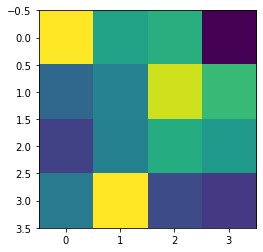

In [71]:
nx, ny = 4, 4
A = np.random.rand(nx, ny)
plt.imshow(A)


In [72]:
A /= A.sum()
A_cul = cumulative_from_mass_2d(A)


In [73]:
xpos, ypos = np.meshgrid(np.arange(nx), np.arange(ny), indexing="ij")
X, Y = xpos.ravel(), ypos.ravel()

top =A.ravel()
bottom = np.zeros_like(top)
width = depth =0.5

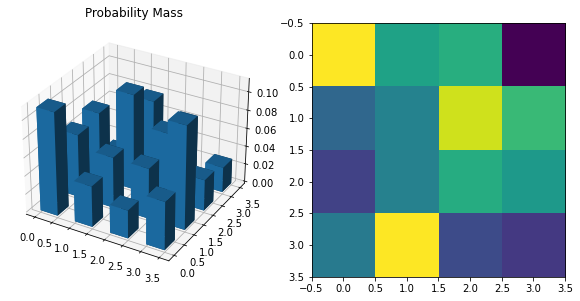

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top, shade=True, zsort='average')
ax.set_title("Probability Mass")
ax2.imshow(A)
plt.show()

In [75]:
A_cul = cumulative_from_mass_2d(A)
top_cul =A_cul.ravel()

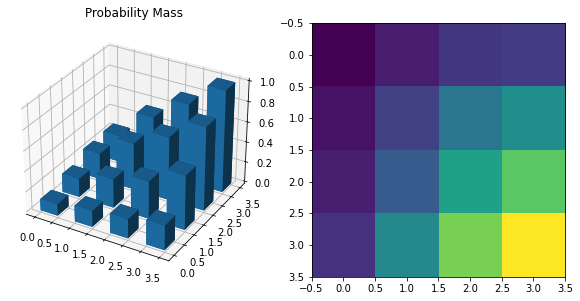

In [76]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top_cul, shade=True, zsort='average')
ax.set_title("Probability Mass")
ax2.imshow(A_cul)
plt.show()